In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
train = pd.read_csv('https://raw.githubusercontent.com/marcodiazz/SICKaggle/main/sic-2023-ml-kickoff-competition/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/marcodiazz/SICKaggle/main/sic-2023-ml-kickoff-competition/test.csv')

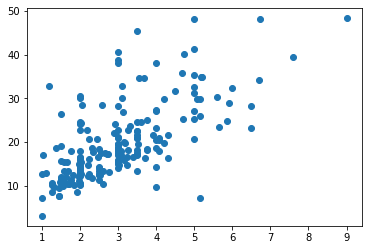

In [212]:
plt.scatter(train.tip, train.total_bill)

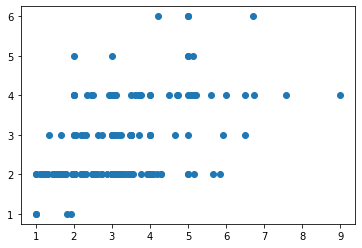

In [213]:
plt.scatter(train.tip, train['size'])

In [214]:
y = train.tip 
y

0      2.50
1      1.00
2      5.14
3      2.34
4      4.00
       ... 
190    3.02
191    2.50
192    4.30
193    3.00
194    3.08
Name: tip, Length: 195, dtype: float64

In [215]:
train = train.drop('tip', axis=1)
train

,total_bill,sex,smoker,day,time,size
0,11.35,Female,Yes,Fri,Dinner,2
1,12.60,Male,Yes,Sat,Dinner,2
2,29.85,Female,No,Sun,Dinner,5
3,17.81,Male,No,Sat,Dinner,4
4,27.20,Male,No,Thur,Lunch,4
...,...,...,...,...,...,...
190,14.83,Female,No,Sun,Dinner,2
191,13.27,Female,Yes,Sat,Dinner,2
192,16.32,Female,Yes,Fri,Dinner,2
193,15.98,Female,No,Fri,Lunch,3


In [216]:
id = test.id
id = pd.DataFrame(id)

In [217]:
import sklearn.compose

train_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("total_bill", "passthrough", [0]),
    ("sex", sklearn.preprocessing.OneHotEncoder(), [1]),
    ("smoker", sklearn.preprocessing.OneHotEncoder(), [2]),
    ("day", sklearn.preprocessing.OneHotEncoder(), [3]),
    ("time", sklearn.preprocessing.OneHotEncoder(), [4]),
    # ("size", sklearn.preprocessing.MinMaxScaler(), [5])
    ("size", "drop", [5])
])

test_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("id", "drop", [0]),
    ("total_bill", "passthrough", [1]),
    ("sex", sklearn.preprocessing.OneHotEncoder(), [2]),
    ("smoker", sklearn.preprocessing.OneHotEncoder(), [3]),
    ("day", sklearn.preprocessing.OneHotEncoder(), [4]),
    ("time", sklearn.preprocessing.OneHotEncoder(), [5]),
    # ("size", sklearn.preprocessing.MinMaxScaler(), [6])
    ("size", "drop", [6])
])

In [218]:
train_t = train_transformer.fit_transform(train)
test_t = test_transformer.fit_transform(test)

In [219]:
from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=26).fit(train_t, y)
# Y_pred_rf = rf.predict(test_t)

# from sklearn.linear_model import SGDRegressor

# reg = SGDRegressor(max_iter=10, random_state=43)
# reg.fit(train_t, y)
# Y_pred_Sgd = reg.predict(test_t)

from sklearn.model_selection import GridSearchCV

parameters_rf = {'n_estimators':range(60,120), 'max_depth': range(1,30)}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters_rf).fit(train_t, y)
Y_pred_rf = clf.predict(test_t)

print(clf.best_params_)

# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(train_t, y)
# Y_pred_lr = reg.predict(test_t)

KeyboardInterrupt: 

In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# import sklearn.compose
# import matplotlib.pyplot as plt

# train = pd.read_csv('https://raw.githubusercontent.com/marcodiazz/SICKaggle/main/sic-2023-ml-kickoff-competition/train.csv')
# test = pd.read_csv('https://raw.githubusercontent.com/marcodiazz/SICKaggle/main/sic-2023-ml-kickoff-competition/test.csv')

# # Split the data into train and test sets
# y = train.tip 
# train = train.drop('tip', axis=1)



# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

# train_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     # ("total_bill", sklearn.preprocessing.MinMaxScaler(), [0]),
#     ("total_bill", "passthrough", [0]),
#     ("sex", sklearn.preprocessing.OneHotEncoder(), [1]),
#     ("smoker", sklearn.preprocessing.OneHotEncoder(), [2]),
#     ("day", sklearn.preprocessing.OneHotEncoder(), [3]),
#     ("time", sklearn.preprocessing.OneHotEncoder(), [4]),
#     # ("size", sklearn.preprocessing.MinMaxScaler(), [5])
#     ("size", "drop", [5])
# ])

# test_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("id", "drop", [0]),
#     # ("total_bill", sklearn.preprocessing.MinMaxScaler(), [1]),
#     ("total_bill", "passthrough", [1]),
#     ("sex", sklearn.preprocessing.OneHotEncoder(), [2]),
#     ("smoker", sklearn.preprocessing.OneHotEncoder(), [3]),
#     ("day", sklearn.preprocessing.OneHotEncoder(), [4]),
#     ("time", sklearn.preprocessing.OneHotEncoder(), [5]),
#     # ("size", sklearn.preprocessing.MinMaxScaler(), [6])
#     ("size", "drop", [6])
# ])

# train_t = train_transformer.fit_transform(X_train)
# test_t = train_transformer.fit_transform(X_test)

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=26).fit(train_t, y_train)
# Y_pred_rf = rf.predict(test_t)


# mse = mean_squared_error(y_test, Y_pred_rf)
# print("El mse es: ", mse)


In [ ]:

Y_pred = pd.DataFrame(Y_pred_knn)
solution = id.join(Y_pred)
solution.columns = ['id', 'tip']
solution.to_csv('solution_knn.csv', index=False)